In [ ]:
#importing libraries
!pip install tensorflow
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#loading the dataset
bank_df = pd.read_csv("D:/MBA 1st Year/Term 3/AML/UniversalBank.csv")
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
bank_df.drop(columns=["ID","ZIP Code"], inplace=True)  #dropping unnecessary columns

In [ ]:
bank_df.drop_duplicates(inplace=True)   #dropping duplicates
bank_df.shape

(4987, 12)

In [ ]:
#descriptive statistics of the dataset
bank_df.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000
mean,45.347704,20.114498,73.824544,2.396631,1.940630,1.879286,56.646080,0.096250,0.104672,0.060557,0.596150,0.294566
std,11.460838,11.464902,46.062728,1.147510,1.748824,0.839667,101.805341,0.294964,0.306161,0.238541,0.490717,0.455893
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.600000,3.000000,101.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#no of rows and columns
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4987 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4987 non-null   int64  
 1   Experience          4987 non-null   int64  
 2   Income              4987 non-null   int64  
 3   Family              4987 non-null   int64  
 4   CCAvg               4987 non-null   float64
 5   Education           4987 non-null   int64  
 6   Mortgage            4987 non-null   int64  
 7   Personal Loan       4987 non-null   int64  
 8   Securities Account  4987 non-null   int64  
 9   CD Account          4987 non-null   int64  
 10  Online              4987 non-null   int64  
 11  CreditCard          4987 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 506.5 KB


In [ ]:
#checking for missing values
(bank_df.isnull().sum()/len(bank_df))*100

Age                   0.0
Experience            0.0
Income                0.0
Family                0.0
CCAvg                 0.0
Education             0.0
Mortgage              0.0
Personal Loan         0.0
Securities Account    0.0
CD Account            0.0
Online                0.0
CreditCard            0.0
dtype: float64

In [ ]:
#outlier detection
def outliers(df,column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    up = q3 + 1.5*iqr
    lb = q1 - 1.5*iqr

    out = df[(df[column]>up) | (df[column]<lb)]
    return out

In [ ]:
selected_columns = bank_df.select_dtypes(include = ["number"])
for col in selected_columns:
    out = outliers(bank_df,col)
    if len(out)>0:
        print("Outliers found in",col,"and the count is",len(out))
    else:
        print("No outliers found in", col)

No outliers found in Age
No outliers found in Experience
Outliers found in Income and the count is 96
No outliers found in Family
Outliers found in CCAvg and the count is 301
No outliers found in Education
Outliers found in Mortgage and the count is 291
Outliers found in Personal Loan and the count is 480
Outliers found in Securities Account and the count is 522
Outliers found in CD Account and the count is 302
No outliers found in Online
No outliers found in CreditCard


In [ ]:
bank_df = bank_df[bank_df["Experience"]>=0]  #setting a threshold for people with experience

In [ ]:
from scipy.stats import mstats
for col in ["Income","CCAvg","Mortgage"]:
    bank_df[col] = mstats.winsorize(bank_df[col], limits=[0.05, 0.05])  #capping the top and bottom 5 percentile values

## Exploratory Data Analysis

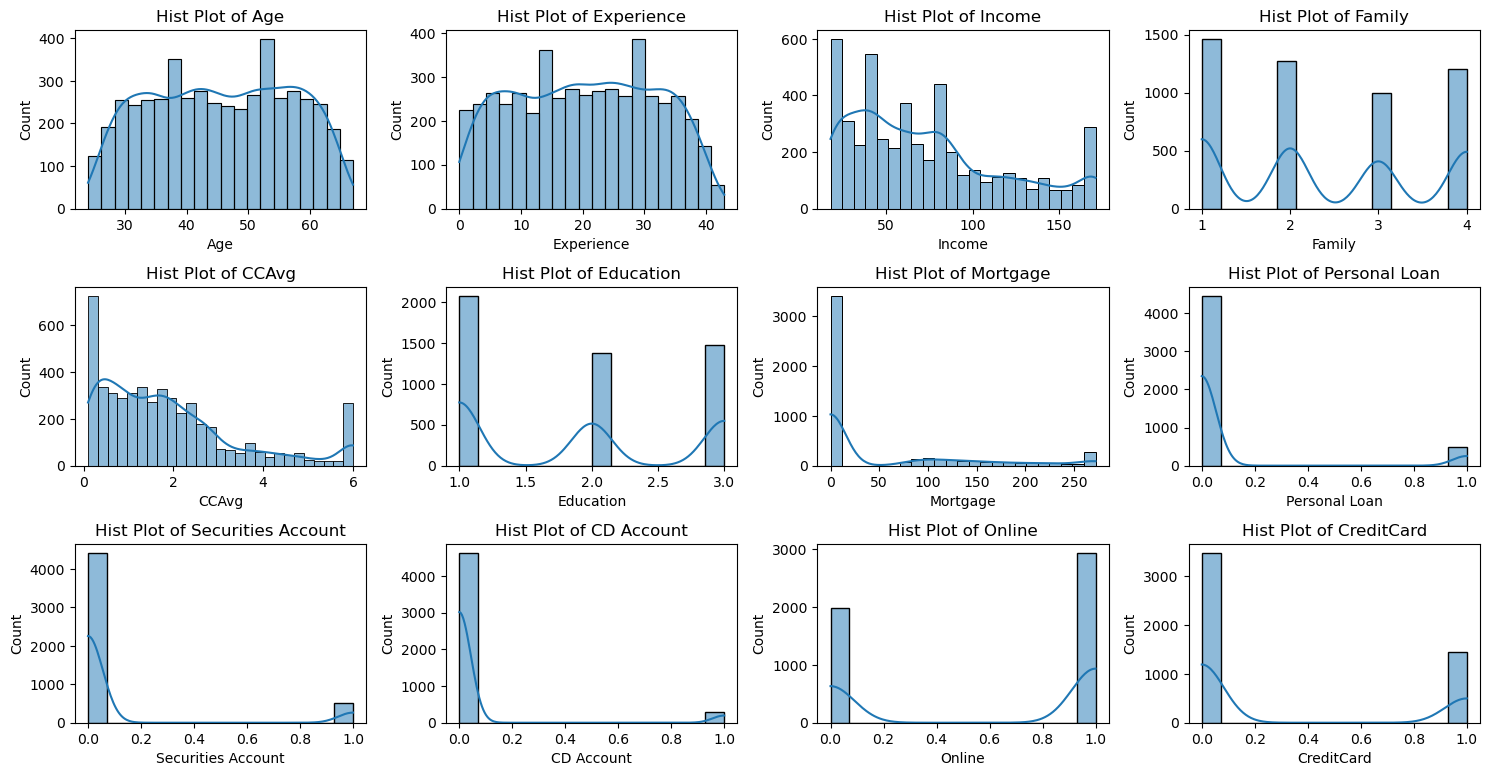

In [ ]:
plt.figure(figsize=(15, 10))

for i, feature in enumerate(bank_df.columns):
    plt.subplot(4, 4, i + 1)
    sns.histplot(bank_df[feature],kde = True)
    plt.title(f'Hist Plot of {feature}')
    plt.xlabel(feature)


plt.tight_layout()
plt.show()

## Key Insights from Histograms
1. Age & Experience
- Fairly uniform distribution with a concentration around 30–50 years.
- Experience follows a similar trend due to its correlation with age.

2. Income
- Right-skewed distribution, indicating most customers have lower incomes.
- A smaller portion earns significantly higher, affecting loan approval rates.

3. Family Size
- Evenly distributed across categories 1 to 4, showing no significant bias.
- CCAvg (Credit Card Average Spending)
- Right-skewed, meaning most customers have low credit card spending.
- Spending gradually decreases as amounts increase, indicating conservative spending habits.

4. Education
- Three distinct peaks suggest well-defined education levels (likely categorical).

5. Mortgage
- Most customers have little to no mortgage, with few taking high-value mortgages.
- Personal Loan, Securities Account, CD Account, Online, CreditCard
- Strong class imbalance, with most customers not having these financial products.
- Could require resampling techniques (e.g., oversampling) for better predictive modeling.

## Conclusion
- Most financial attributes (income, credit card spending, mortgage) are right-skewed, meaning the majority have lower values while a few have significantly higher.
- The dataset includes both continuous and categorical distributions, requiring preprocessing before applying predictive models.

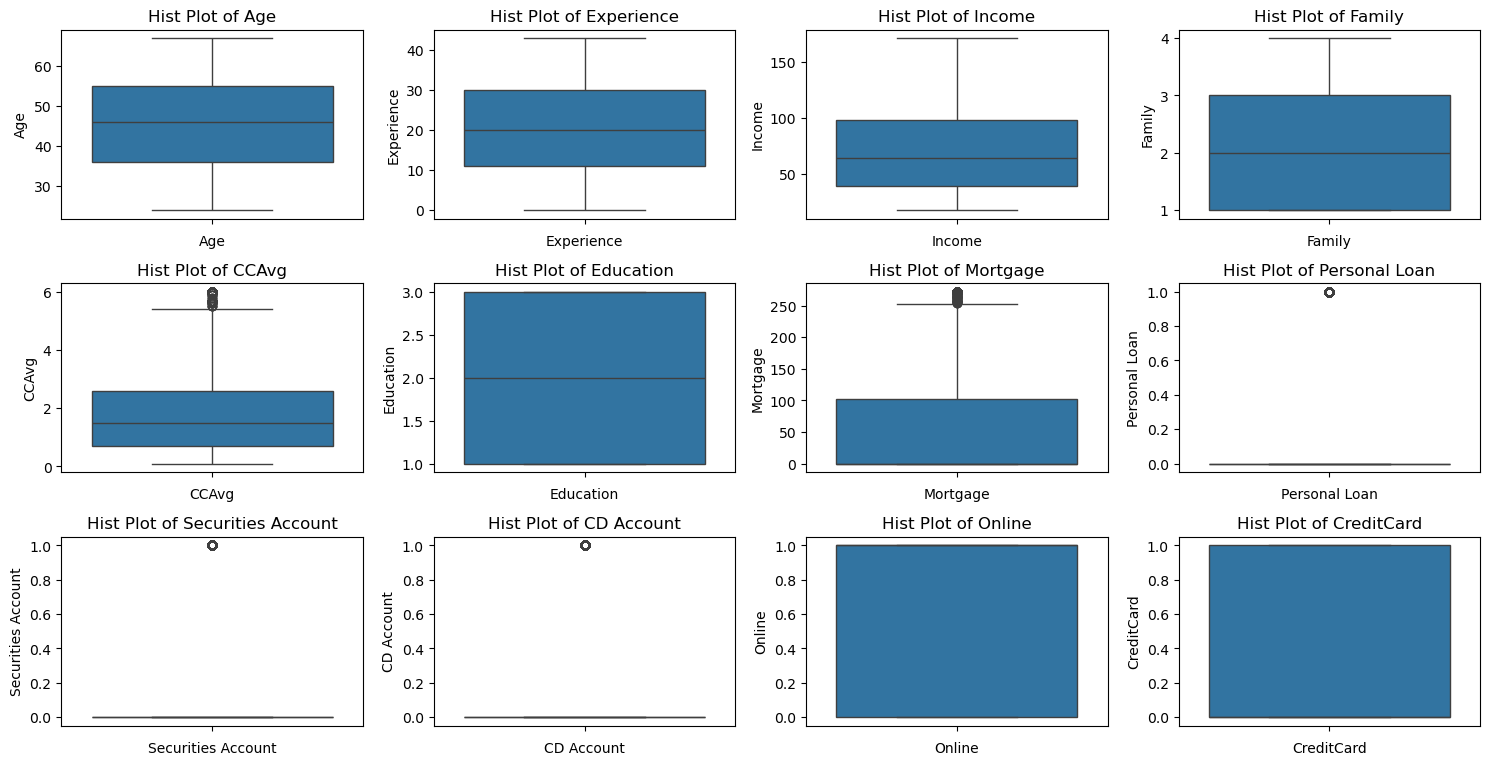

In [ ]:
plt.figure(figsize=(15, 10))

for i, feature in enumerate(bank_df.columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(bank_df[feature])
    plt.title(f'Hist Plot of {feature}')
    plt.xlabel(feature)


plt.tight_layout()
plt.show()

## Key Insights from Box Plots
1. Age & Experience
- Both distributions appear fairly uniform, with a median around 45 years for age and 20 years for experience.
- No significant outliers observed.

2. Income
- Right-skewed distribution, with most values concentrated at lower income levels.
- A few outliers at the higher end indicate some high-income customers.

3. Family Size
- Evenly distributed across values 1 to 4, suggesting a balanced family structure.
- CCAvg (Credit Card Average Spending)
- Right-skewed with several outliers at the upper end.
- Most customers have low credit card spending.

4. Education
- Appears categorical with three distinct levels.
- Balanced distribution across categories.

5. Mortgage
- Right-skewed, with most customers having little to no mortgage.
- Some extreme values (outliers) indicate customers with high mortgage amounts.
- Personal Loan, Securities Account, CD Account, Online, Credit Card
- Most customers do not have these financial products, indicating strong class imbalances.
- Only a small proportion have securities accounts and CD accounts.

## Conclusion
- Income, CCAvg, and Mortgage are right-skewed, meaning most customers have lower values, while a few have significantly higher.
- There are class imbalances in financial product ownership, which may require resampling techniques for predictive modeling.
- Outliers in CCAvg and Mortgage indicate high-value customers who might be key segments for financial services.

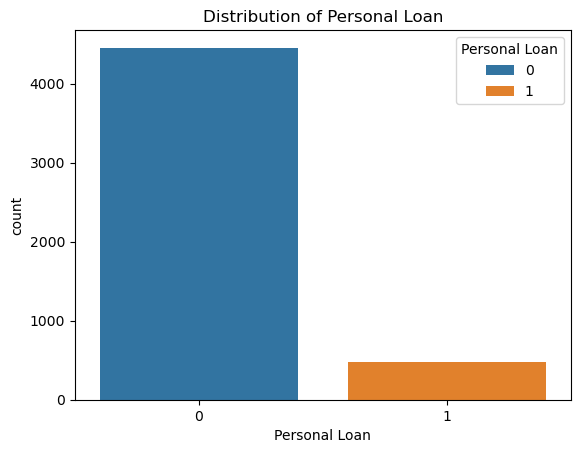

Personal Loan
0    4455
1     480
Name: count, dtype: int64

In [ ]:
sns.countplot(x='Personal Loan', data=bank_df, hue='Personal Loan')
plt.title('Distribution of Personal Loan')
plt.show()
bank_df["Personal Loan"].value_counts()

## Correlation Analysis and Data Preprocessing

In [ ]:
bank_df = pd.get_dummies(bank_df, columns=['Education'], drop_first=True) #one hot encoding for Education column

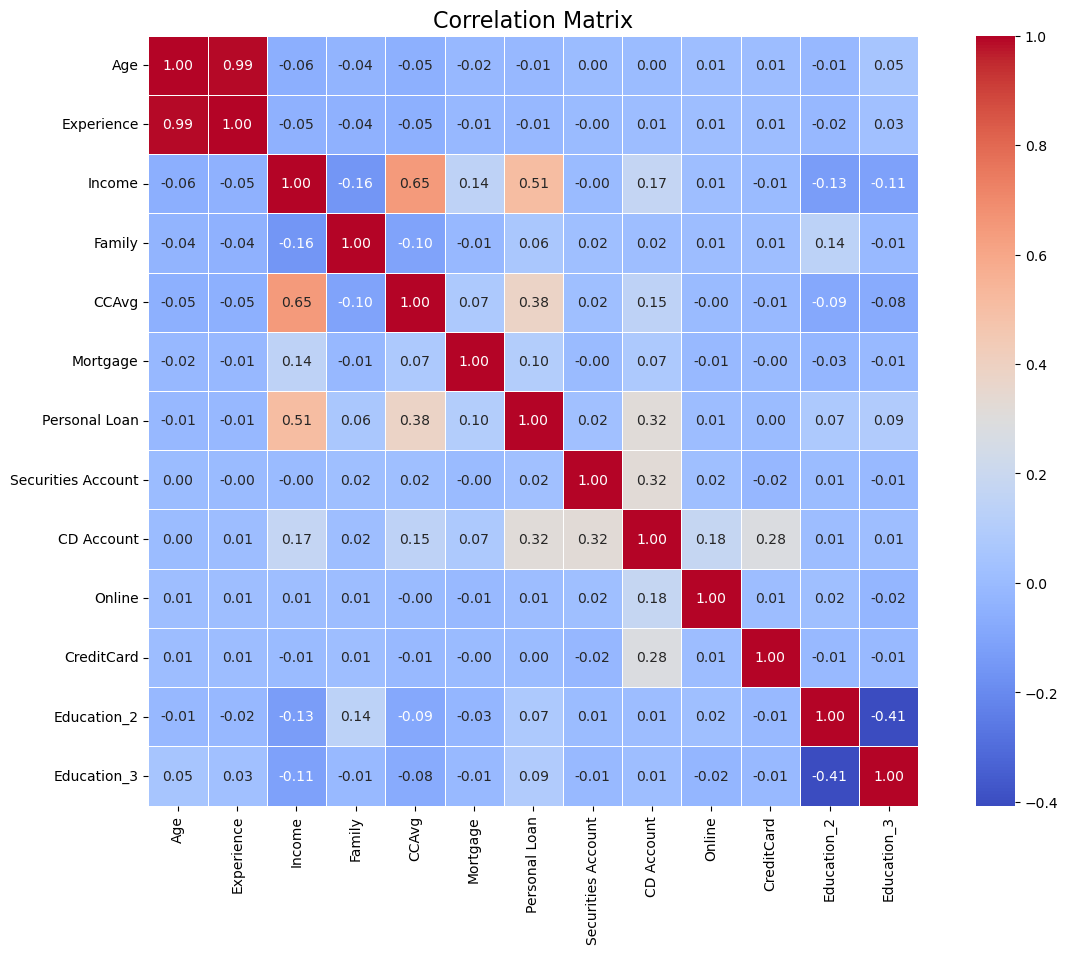

In [ ]:
#checking the correlation matrix
correlation_matrix = bank_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5, cbar=True)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

## Summary of the Correlation Matrix
1. Strong Positive Correlations:
- Age & Experience (~0.99) → Almost perfectly correlated, meaning one increases as the other does.
- Income & CCAvg (Credit Card Avg Spending) (~0.65) → Higher income tends to be associated with higher credit card spending.
- Income & Personal Loan (~0.51) → Higher income individuals are more likely to take personal loans.
- CD Account & Online Banking (~0.28) → Customers with CD accounts tend to use online banking more.

2. Moderate Positive Correlations:
- CCAvg & Personal Loan (~0.38) → Higher credit card spending is linked to taking personal loans.
- CD Account & Personal Loan (~0.32) → Customers with CD accounts may also take personal loans.
- Securities Account & CD Account (~0.32) → Having one type of investment account is linked to having another.

3. Negative Correlations:
- Education Level 2 & Education Level 3 (~-0.41) → Mutually exclusive categories.
- Income & Education Level 3 (~-0.11) → People with Education Level 3 may have slightly lower income.
- Income & Education Level 2 (~-0.13) → Similar trend with a weaker correlation.

## Key Insights
- Age & Experience are redundant → One of them could be dropped in a predictive model.
- Higher-income individuals tend to have more credit card spending and take personal loans.
- Investment-linked accounts (CD & Securities) show some correlation.
- Education levels seem negatively correlated, suggesting they are categorical variables

In [ ]:
# Define features (X) and target (y)
X = bank_df.drop(columns=['Personal Loan'])
y = bank_df['Personal Loan']

In [ ]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

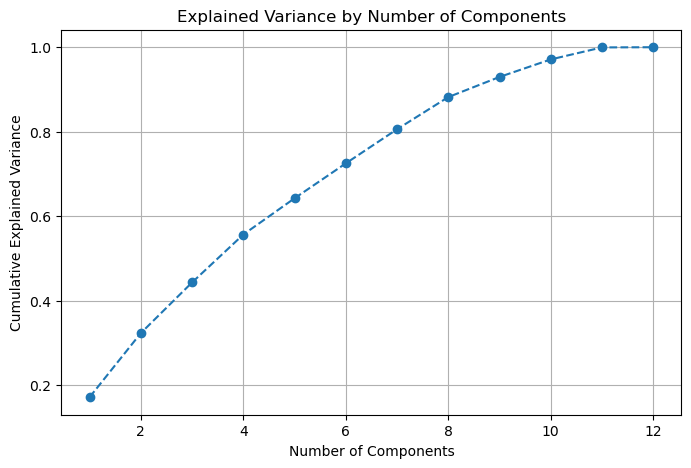

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()

pca.fit(X_train)
cumulative_variance = pca.explained_variance_ratio_.cumsum() #checking for cumulative variance explained by the features

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [ ]:
pca = PCA(n_components=10)  #applying PCA and selecting 10 features

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Naive Bayes': BernoulliNB(),
    'SVM': SVC(kernel='linear'),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

# Define parameter grids for hyperparameter tuning
param_grids = {
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10, 100]},
    'Naive Bayes': {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'Decision Tree': {'max_depth': [None, 10, 20], 'criterion': ['gini', 'entropy']},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
}

Logistic Regression Best Parameters: {'C': 1}

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       895
           1       0.77      0.62      0.69        92

    accuracy                           0.95       987
   macro avg       0.87      0.80      0.83       987
weighted avg       0.94      0.95      0.94       987



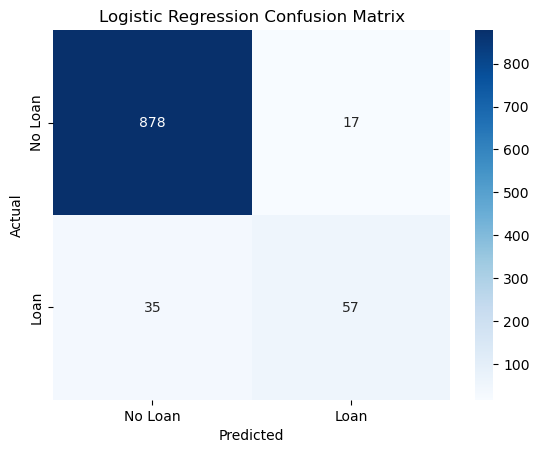

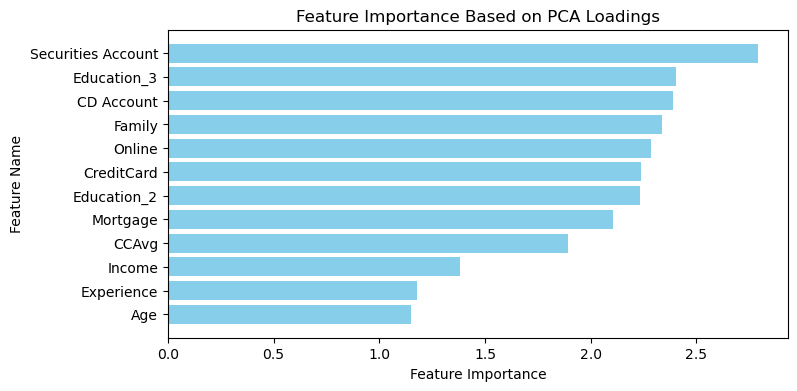

Naive Bayes Best Parameters: {'alpha': 0.1}

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       895
           1       0.90      0.20      0.32        92

    accuracy                           0.92       987
   macro avg       0.91      0.60      0.64       987
weighted avg       0.92      0.92      0.90       987



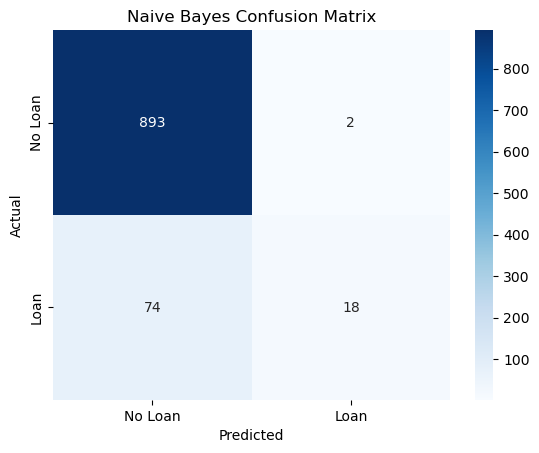

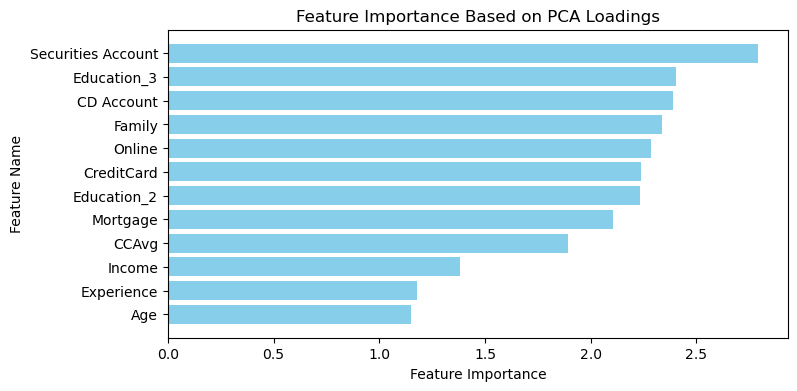


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       895
           1       0.88      0.57      0.69        92

    accuracy                           0.95       987
   macro avg       0.92      0.78      0.83       987
weighted avg       0.95      0.95      0.95       987



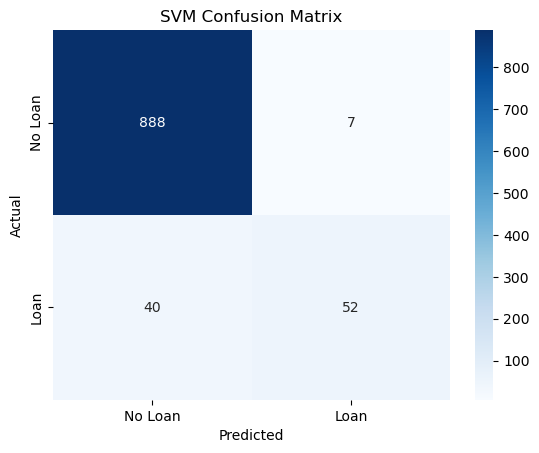

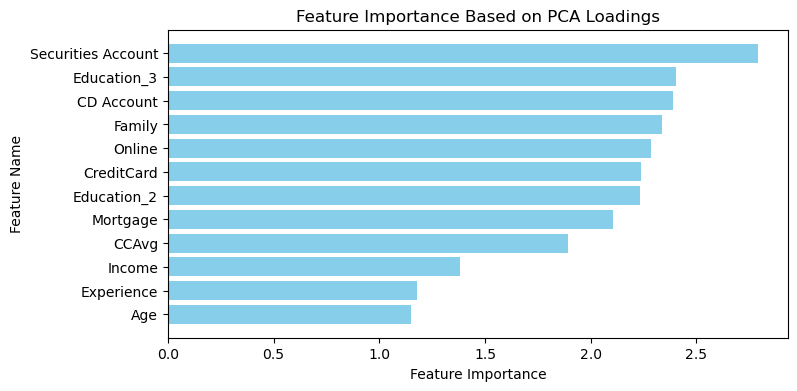

Random Forest Best Parameters: {'max_depth': None, 'n_estimators': 100}

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       895
           1       0.89      0.70      0.78        92

    accuracy                           0.96       987
   macro avg       0.93      0.84      0.88       987
weighted avg       0.96      0.96      0.96       987



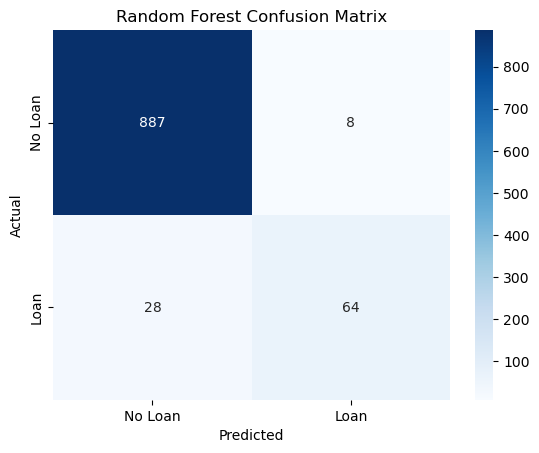

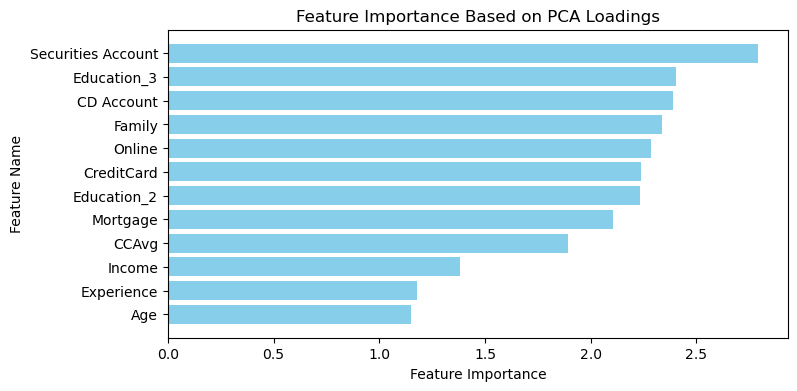

Decision Tree Best Parameters: {'criterion': 'gini', 'max_depth': 10}

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       895
           1       0.74      0.64      0.69        92

    accuracy                           0.95       987
   macro avg       0.85      0.81      0.83       987
weighted avg       0.94      0.95      0.94       987



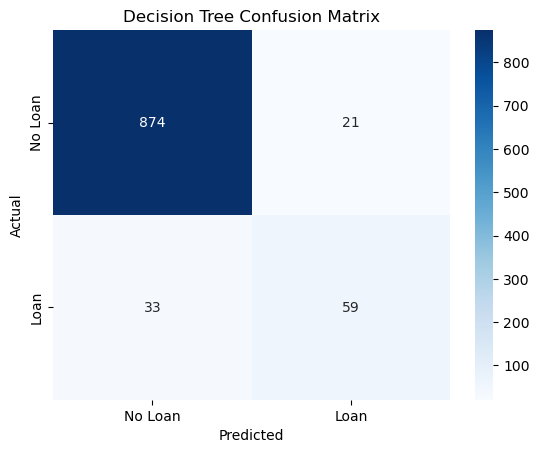

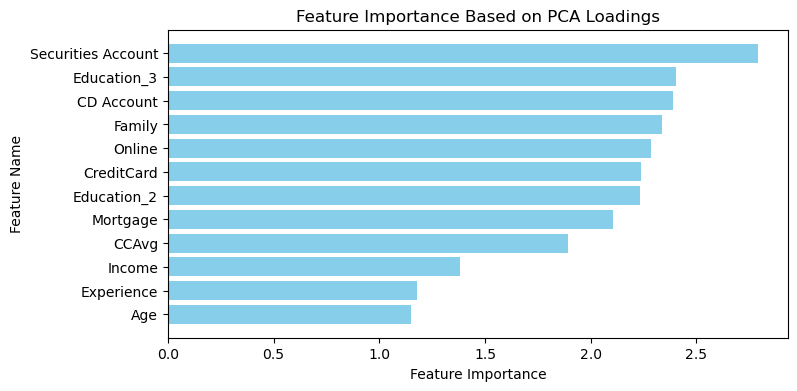

XGBoost Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       895
           1       0.89      0.76      0.82        92

    accuracy                           0.97       987
   macro avg       0.93      0.88      0.90       987
weighted avg       0.97      0.97      0.97       987



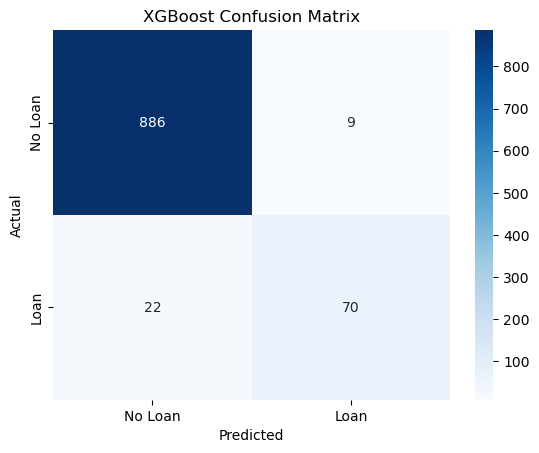

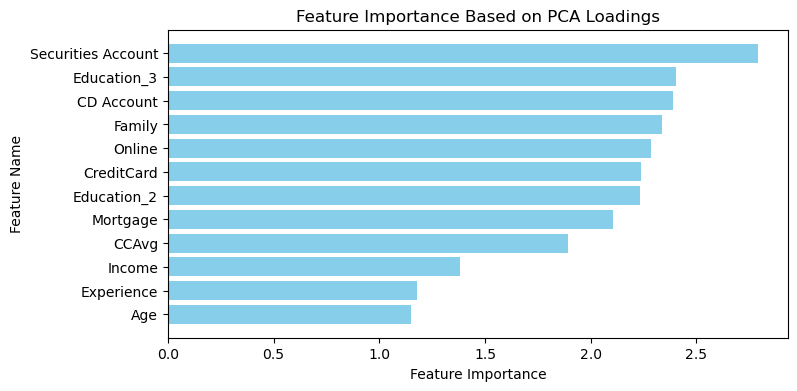

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.inspection import permutation_importance

results = []
misclassified_results = {}

for name, model in models.items():
    if name in param_grids and param_grids[name]:
        grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy')
        grid_search.fit(X_train_pca, y_train)
        model = grid_search.best_estimator_
        print(f"{name} Best Parameters: {grid_search.best_params_}")
    else:
        model.fit(X_train_pca, y_train)

    y_pred = model.predict(X_test_pca)
    y_proba = model.predict_proba(X_test_pca)[:, 1] if hasattr(model, 'predict_proba') else None

    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Loan', 'Loan'], yticklabels=['No Loan', 'Loan'])
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    pca_components = np.abs(pca.components_)  # Take absolute values

    # Step 2: Sum the absolute contributions of each original feature
    feature_importance_pca = pca_components.sum(axis=0)  # Sum across components

    # Step 3: Create a DataFrame for visualization
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,  # Original feature names
        'Importance': feature_importance_pca
    }).sort_values(by='Importance', ascending=False)

    # Step 4: Plot feature importance
    plt.figure(figsize=(8, 4))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Name')
    plt.title('Feature Importance Based on PCA Loadings')
    plt.gca().invert_yaxis()
    plt.show()


    false_positives = (y_test == 0) & (y_pred == 1)
    false_negatives = (y_test == 1) & (y_pred == 0)

    misclassified_results[name] = {
        'False Positives': false_positives.sum(),
        'False Negatives': false_negatives.sum(),
        'Total Misclassified': (false_positives.sum() + false_negatives.sum())
    }

In [ ]:
# Neural Network using TensorFlow
model_nn = Sequential([
    Dense(64, activation='relu', input_dim=X_train_pca.shape[1]),
    Dense(32, activation='relu'),
    Dense(1, activation = 'sigmoid')  # Output layer for classification
])

# Compile the model
model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_nn.fit(X_train_pca, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50


c:\Users\SOHAM PAL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8486 - loss: 0.4145 - val_accuracy: 0.9278 - val_loss: 0.1727
Epoch 2/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9351 - loss: 0.1697 - val_accuracy: 0.9608 - val_loss: 0.1203
Epoch 3/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9434 - loss: 0.1470 - val_accuracy: 0.9620 - val_loss: 0.1041
Epoch 4/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9543 - loss: 0.1220 - val_accuracy: 0.9696 - val_loss: 0.1011
Epoch 5/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9616 - loss: 0.1016 - val_accuracy: 0.9671 - val_loss: 0.0921
Epoch 6/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9680 - loss: 0.0956 - val_accuracy: 0.9684 - val_loss: 0.0915
Epoch 7/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9666 - loss: 0.0899 - val_accuracy: 0.9696 - val_loss: 0.0879
Epoch 8/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9680 - loss: 0.0852 - val_accuracy: 0.9684 - val_loss: 0.0855
Epo

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       895
           1       0.86      0.83      0.84        92

    accuracy                           0.97       987
   macro avg       0.92      0.91      0.91       987
weighted avg       0.97      0.97      0.97       987



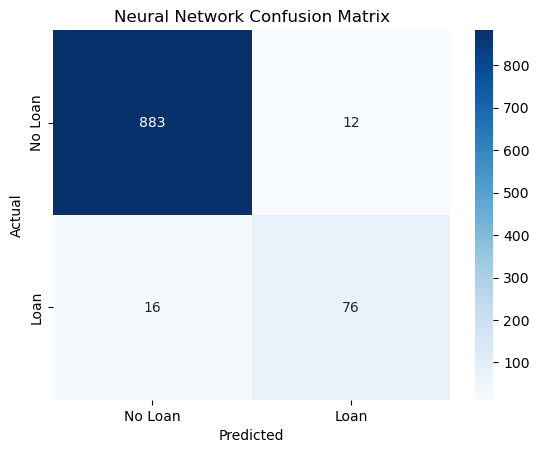

In [ ]:
# Evaluate Neural Network
y_proba = model_nn.predict(X_test_pca).flatten()
nn_pred = (y_proba > 0.5).astype(int)  # Convert to binary predictions
print("\nNeural Network Classification Report:")
print(classification_report(y_test, nn_pred))

# Confusion Matrix for Neural Network
cm = confusion_matrix(y_test, nn_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Loan', 'Loan'], yticklabels=['No Loan', 'Loan'])
plt.title("Neural Network Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

false_positives = (y_test == 0) & (y_pred == 1)
false_negatives = (y_test == 1) & (y_pred == 0)

misclassified_results['Neural Network'] = {
        'False Positives': false_positives.sum(),
        'False Negatives': false_negatives.sum(),
        'Total Misclassified': (false_positives.sum() + false_negatives.sum())
    }

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

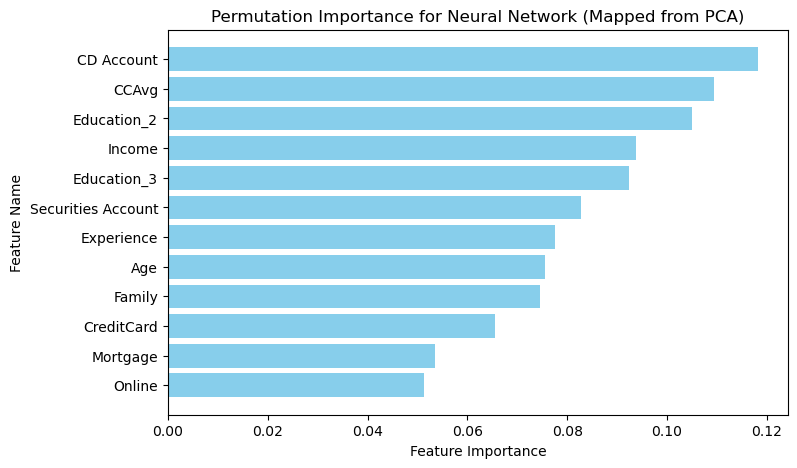

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.base import BaseEstimator, ClassifierMixin

# Custom Wrapper for Keras Model
class KerasWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model):
        self.model = model
        self.classes_ = np.array([0, 1])  # Required for sklearn compatibility

    def fit(self, X, y):
        self.model.fit(X, y, epochs=10, verbose=0)
        return self

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype(int).flatten()

    def predict_proba(self, X):
        return np.hstack([(1 - self.model.predict(X)), self.model.predict(X)])  # Return probabilities for both classes

# 1️⃣ **Get the original feature names BEFORE applying PCA**
original_feature_names = X.columns  # X_train_original is the raw dataset before PCA

# 2️⃣ **Wrap the trained Neural Network model**
wrapped_nn = KerasWrapper(model_nn)

# 3️⃣ **Compute Permutation Importance on PCA-transformed X_test**
perm_importance = permutation_importance(wrapped_nn, X_test_pca, y_test,
                                         scoring='accuracy',
                                         n_repeats=10, random_state=42)

# 4️⃣ **Extract importances from PCA-transformed features**
pca_importances = perm_importance.importances_mean  # These are for PCA components

# 5️⃣ **Map PCA component importance back to original features**
pca_components = np.abs(pca.components_)  # Take absolute values
original_feature_importance = np.dot(pca_components.T, pca_importances)  # Multiply with PCA components

# 6️⃣ **Normalize feature importance scores**
original_feature_importance /= original_feature_importance.sum()

# 7️⃣ **Create a DataFrame with the original feature names**
feature_importance_df = pd.DataFrame({
    'Feature': original_feature_names,
    'Importance': original_feature_importance
}).sort_values(by='Importance', ascending=False)

# ✅ **Check for length mismatch**
if len(feature_importance_df) != len(original_feature_names):
    print("⚠️ Mismatch detected! Ensure that X_train and X_test were transformed with the same PCA model.")

# 8️⃣ **Print the Top 10 Most Important Features**
print("\nNeural Network Permutation Feature Importance (Mapped to Original Features):")
print(feature_importance_df.head(10))

# 9️⃣ **Plot Feature Importance**
plt.figure(figsize=(8, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Permutation Importance for Neural Network (Mapped from PCA)')
plt.gca().invert_yaxis()
plt.show()

## Insights on Each Model's Performance & Feature Importance

## 1.📊 Logistic Regression Insights
🔹 Performance:

✅ Accuracy: 87%

🎯 Class-wise Precision & Recall:

- No Loan (0): Precision = 0.96, Recall = 0.98 ✅
- Loan (1): Precision = 0.77, Recall = 0.62 ⚠️

📉 Confusion Matrix Insights:

- High accuracy for the No Loan class ✅
- 35 false negatives (missed loan cases) ❌
- Lower recall for Loan cases → potential issue in detecting true positives 🔍

🔥 Feature Importance:

Top Predictors:

1️⃣ Securities Account 🏦 (Most impactful)

2️⃣ Education Level (Education_3) 🎓

3️⃣ CD Account 💳

Less Impactful Features:

- Income 💰, Experience 🏅, and Age 🎂 contribute less to predictions.

💡 Insights & Next Steps:

✅ Strong overall performance but recall for Loan cases needs improvement 🚀

🔍 Financial behavior (like accounts & credit usage) has higher impact than demographic features.

## 2. 📊 Naive Bayes Classification Insights

🔹 Performance:

- Best Hyperparameter: α = 0.1
- Overall Accuracy: 92%
- Class-wise Performance:
- Class 0 (Majority): Precision: 0.92, Recall: 1.00, F1-score: 0.96
- Class 1 (Minority): Precision: 0.90, Recall: 0.20, F1-score: 0.32
- Macro Average F1-score: 0.64 (Imbalanced class performance)
- Weighted Average F1-score: 0.90

⚠️ Key Observations:

- The model performs exceptionally well on class 0, but struggles with class 1 due to low recall (0.20).
- Imbalance issue: The minority class (1) is underrepresented, leading to poor recall and high false negatives.
- Possible improvements: Class balancing techniques (SMOTE, oversampling, class-weight adjustments) or using a different model like Random Forest or SVM.

🔥 Feature Importance (PCA Loadings)

- Top Influencing Features:
- Securities Account 🏦 (Most impactful)
- Education Level (Education_3)
- CD Account 💳
- Family Size
- Online Banking Usage 🌐

Experience (Least impactful)

🔍 Insights:

- Financial behavior features (Securities Account, CD Account, Credit Card, CCAvg) heavily influence predictions.
- Online banking & education levels also impact classification.
- Income & experience play a lesser role, suggesting customer financial products matter more than earnings.
- PCA-based selection helps reduce dimensions but might miss non-linear relationships.

## 3. Support Vector Machine (SVM)

📊 Performance:

✅ Accuracy: 95%

🎯 Precision & Recall:
- No Loan (0): Precision = 0.96, Recall = 0.99
- Loan (1): Precision = 0.88, Recall = 0.57

🔍 Confusion Matrix Insights:

- High precision and recall for No Loan cases.
- ⚠️ Loan (1) class recall is lower (57%), meaning many loan cases are misclassified as non-loans.

📌 Feature Importance:

🔝 Top Predictors:

- Securities Account (most impactful)
- Education Level (Education_3)

CD Account

⬇️ Less Impactful Features:

Income, Experience, and Age contribute less.

💡 Insight:

The model achieves high accuracy but struggles with recall for Loan cases.
- 💰 Financial features play a more significant role than demographic details.
- 🚀 To improve recall: Consider adjusting class weights, using more advanced kernels, or applying oversampling techniques (SMOTE).

## 4. 🌲 Random Forest

📊 Performance:

✅ Accuracy: 96%

🎯 Precision & Recall:
- No Loan (0): Precision = 0.97, Recall = 0.99
- Loan (1): Precision = 0.89, Recall = 0.70

🔍 Confusion Matrix Insights:

- High accuracy & precision for No Loan cases
- Loan (1) class recall (70%) is better than SVM but still leaves room for improvement

📌 Feature Importance:

🔝 Top Predictors:

- Securities Account (most important)
- Education Level (Education_3)

CD Account

⬇️ Less Impactful Features:
Income, Experience, and Age contribute the least.

💡 Insight:

🌟 Strong overall performance with better recall than SVM.

📊 Feature importance suggests financial behavior is key to prediction.

🚀 To further enhance recall: Try increasing n_estimators, fine-tuning max_depth, or using boosting methods (like XGBoost).

## 5. 🌳 Decision Tree

📊 Performance:

✅ Accuracy: 95%

🎯 Precision & Recall:
- No Loan (0): Precision = 0.96, Recall = 0.98
- Loan (1): Precision = 0.74, Recall = 0.64

🔍 Confusion Matrix Insights:
- Good precision for Loan class but recall still needs improvement.
- More false negatives compared to Random Forest.

📌 Feature Importance:

🔝 Top Predictors:
- Securities Account (most impactful)
- Education Level (Education_3)
- CD Account

⬇️ Less Impactful Features:

- Income, Experience, and Age contribute the least.

💡 Insight:

🎯 Performs well but recall for Loan cases is still moderate.

📊 Feature importance aligns with other models, emphasizing financial behavior.

🚀 To improve recall: Try reducing max_depth, tuning min_samples_split, or using ensemble methods like Random Forest or XGBoost.

## 6. 🚀 XGBoost

📊 Performance:

✅ Accuracy: 97%

🎯 Precision & Recall:
- No Loan (0): Precision = 0.98, Recall = 0.99
- Loan (1): Precision = 0.89, Recall = 0.76

🔍 Confusion Matrix Insights:
- Best recall for Loan cases so far!
- Still some false negatives, but much improved over other models.

📌 Feature Importance:

🔝 Top Predictors:
- Securities Account (most impactful)
- Education Level (Education_3)
- CD Account

⬇️ Less Impactful Features:

Income, Experience, and Age contribute the least.

💡 Insight:

🏆 Strongest overall model so far, balancing precision & recall well.

📊 Feature importance aligns with other models, emphasizing financial behavior.

⚡ Potential Next Steps: Fine-tune hyperparameters further, explore feature engineering, or use ensemble stacking for even better performance!

## 7. 🧠 Neural Network

📊 Performance:

✅ Accuracy: 97%

🎯 Precision & Recall:
- No Loan (0): Precision = 0.98, Recall = 0.99
- Loan (1): Precision = 0.86, Recall = 0.83

🔍 Confusion Matrix Insights:
- Best recall for Loan cases so far!
- False negatives reduced further compared to other models.

📌 Feature Importance:

🔝 Top Predictors:
- CD Account (most impactful)
- CCAvg (Credit Card Avg Usage)
- Education_2 & Education_3

⬇️ Less Impactful Features:

Securities Account, Experience, Age, and Family.

💡 Insight:

🏆 Best model for recall on Loan cases, balancing overall performance.

📊 Unlike previous models, CD Account & Credit Card Usage emerge as key factors.

⚡ Potential Next Steps:

- Fine-tune network architecture for even better results.
- Try dropout regularization to prevent overfitting.
- Explore ensemble learning with XGBoost for hybrid benefits! 🚀

In [ ]:
# Convert to DataFrame for easy comparison
misclassified_df = pd.DataFrame(misclassified_results).T.sort_values(by='Total Misclassified', ascending=True)
print("\nMisclassification Summary:")
print(misclassified_df)


Misclassification Summary:
                     False Positives  False Negatives  Total Misclassified
XGBoost                            9               22                   31
Neural Network                     9               22                   31
Random Forest                      8               28                   36
SVM                                7               40                   47
Logistic Regression               17               35                   52
Decision Tree                     21               33                   54
Naive Bayes                        2               74                   76


<Figure size 1000x500 with 0 Axes>

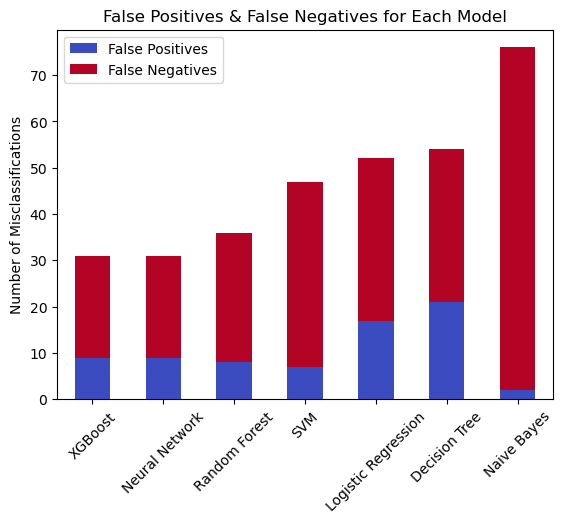

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
misclassified_df[['False Positives', 'False Negatives']].plot(kind='bar', stacked=True, colormap='coolwarm')
plt.ylabel("Number of Misclassifications")
plt.title("False Positives & False Negatives for Each Model")
plt.xticks(rotation=45)
plt.show()
